In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

In [2]:
# Load dataset and parse dates
df = pd.read_csv("coin_Bitcoin.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Filter to match the model's training/validation/testing period
df = df[(df['Date'] >= '2013-04-29') & (df['Date'] <= '2019-04-28')].copy()

# Drop irrelevant columns
df = df.drop(columns=['SNo', 'Name', 'Symbol'])

# Set consistent plot color
blue = '#72AEE6'

Note: We restrict the EDA to the same 2013–2019 date range used for training, validation, and testing in our model experiments. This ensures consistency between the data used for analysis and the data fed into the CryptoMamba architecture. Although our raw dataset extends beyond 2019, this cutoff aligns with our experimental design and allows for meaningful comparison of results.

In [3]:
# Summary statistics
display(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']].describe())

,Open,High,Low,Close,Volume,Marketcap
count,2190.000000,2190.000000,2190.000000,2190.000000,2.190000e+03,2.190000e+03
mean,2404.747179,2474.220367,2327.979447,2406.929895,1.920267e+09,4.010574e+10
std,3352.129820,3472.450009,3206.439930,3352.123816,3.558280e+09,5.718510e+10
min,68.504997,74.561096,65.526001,68.431000,0.000000e+00,7.784112e+08
25%,345.100754,352.970253,335.792740,345.380753,1.979718e+07,4.786450e+09
50%,626.457001,638.853516,616.894501,626.548492,6.728320e+07,9.181437e+09
75%,3851.284576,3920.327703,3751.791915,3854.678445,2.867500e+09,6.684117e+10
max,19475.800781,20089.000000,18974.099609,19497.400391,2.384090e+10,3.265025e+11


Summary statistics show a wide range in Bitcoin’s price and market cap, with strong right skewness. The large gap between mean and maximum values highlights the presence of extreme outliers and high volatility.

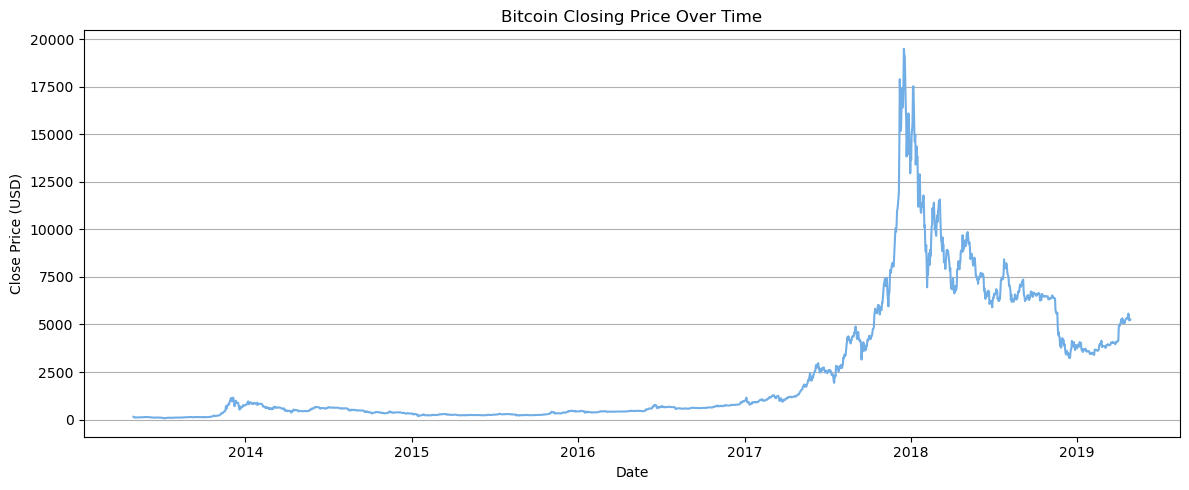

In [4]:
# Closing price over time
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], color=blue)
plt.title("Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Bitcoin’s closing price remained relatively low until late 2016, followed by a sharp surge in 2017. This rise suggests a speculative bubble, peaking just before the end of the dataset.

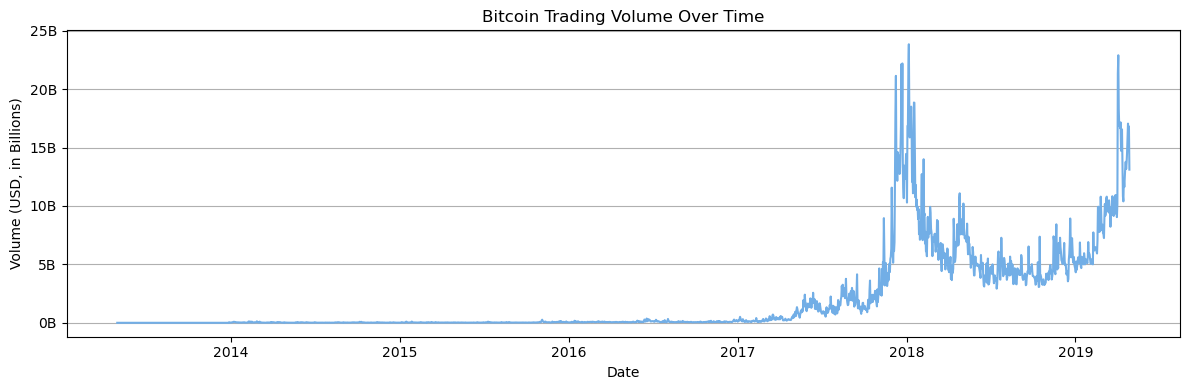

In [5]:
# Volume over time (in billions)
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Volume'], color=blue)
plt.title("Bitcoin Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume (USD, in Billions)")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-9:.0f}B'))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Trading volume shows a similar pattern, with a dramatic increase in late 2017 and early 2018. This trend suggests that price rallies were accompanied by increased trading activity and market participation.

In [6]:
# Count zero-volume days
zero_volume_days = (df['Volume'] == 0).sum()
print(f"Days with zero volume: {zero_volume_days}")

Days with zero volume: 242


There are 242 days with zero trading volume, mostly concentrated in the early years. These likely reflect limited exchange infrastructure or missing data during Bitcoin’s early development phase.

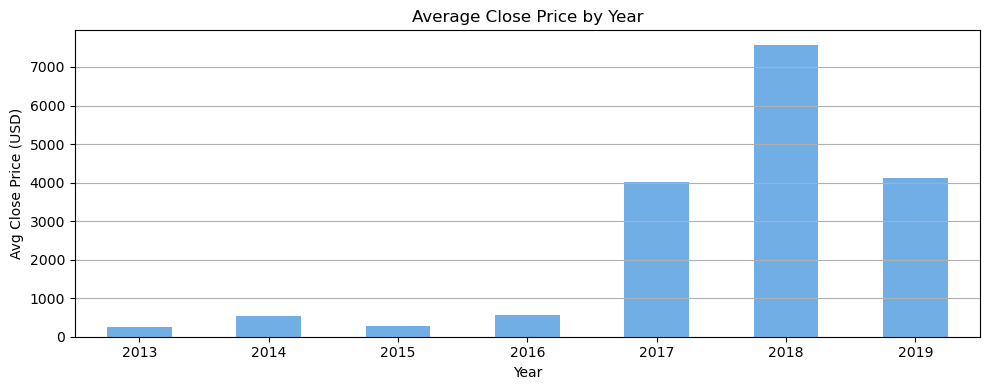

In [7]:
# Yearly average closing price
df['Year'] = df['Date'].dt.year
df.groupby('Year')['Close'].mean().plot(kind='bar', figsize=(10, 4), color=blue)
plt.title("Average Close Price by Year")
plt.ylabel("Avg Close Price (USD)")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The yearly average closing price stayed relatively flat until 2016, then rose sharply in 2017 and peaked in 2018. This trend reflects growing investor interest and speculative behavior during Bitcoin’s bull cycle.

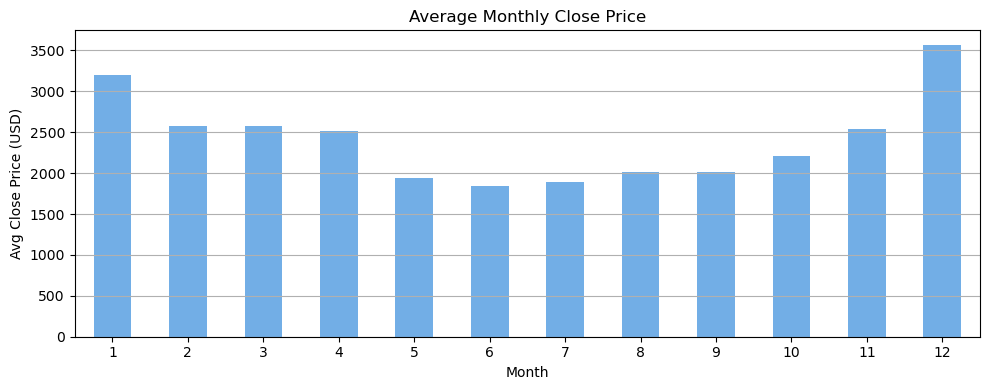

In [8]:
# Monthly average closing price
df['Month'] = df['Date'].dt.month
df.groupby('Month')['Close'].mean().plot(kind='bar', figsize=(10, 4), color=blue)
plt.title("Average Monthly Close Price")
plt.ylabel("Avg Close Price (USD)")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Monthly averages indicate potential seasonality, with elevated prices observed from January to April and again in November–December. These peaks may correspond to investor cycles or broader macroeconomic trends.

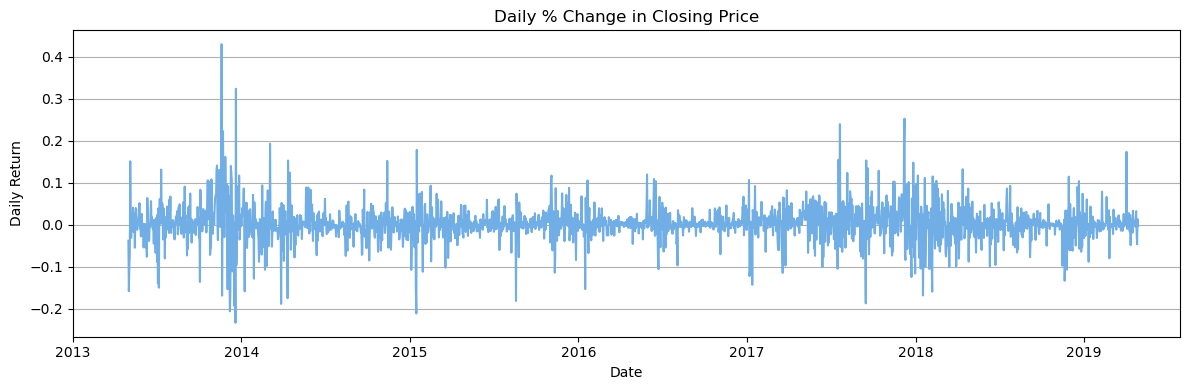

In [9]:
# Daily % change in closing price
df['Daily_Return'] = df['Close'].pct_change()

plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Daily_Return'], color=blue)
plt.title("Daily % Change in Closing Price")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(axis='y')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlim(datetime(2013, 1, 1), df['Date'].max() + pd.DateOffset(months=3))
plt.tight_layout()
plt.show()

The daily return plot reveals frequent volatility, with the most extreme fluctuations occurring in 2014. This highlights a period of intense market turbulence and price instability.

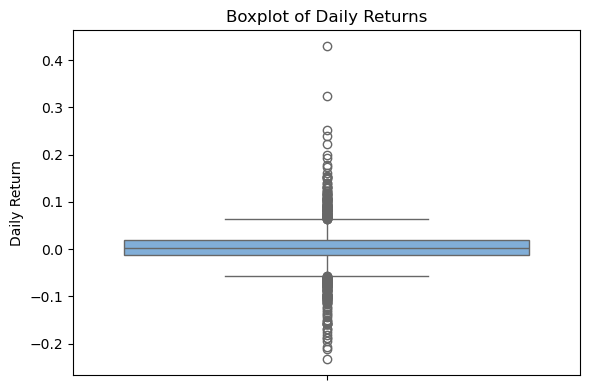

In [10]:
# Boxplot of daily returns
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Daily_Return'].dropna(), color=blue)
plt.title("Boxplot of Daily Returns")
plt.ylabel("Daily Return")
plt.tight_layout()
plt.show()

Most daily returns cluster near zero, but the boxplot shows numerous outliers on both ends—especially on the positive side. This reflects Bitcoin’s tendency for sharp price rallies and occasional extreme movements.

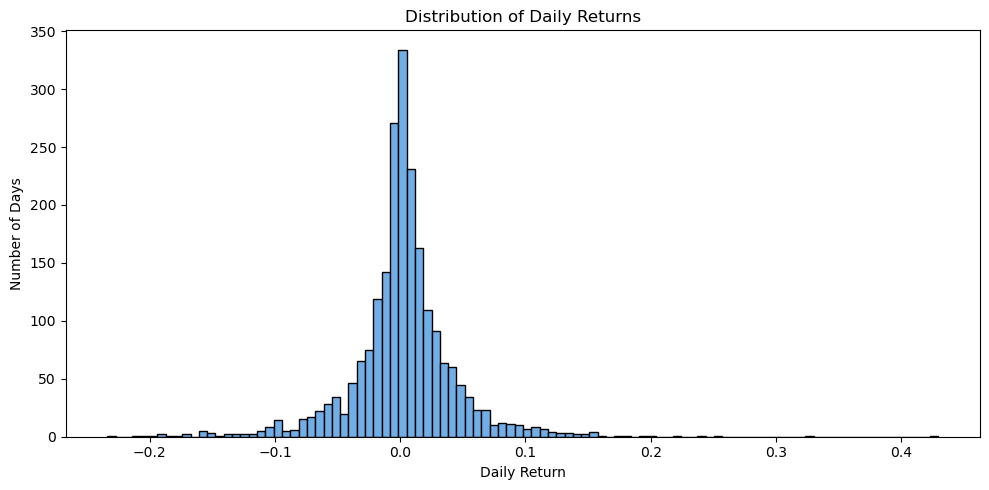

In [11]:
# Histogram of daily returns
plt.figure(figsize=(10, 5))
plt.hist(df['Daily_Return'].dropna(), bins=100, color=blue, edgecolor='black')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Number of Days")
plt.tight_layout()
plt.show()

The histogram shows a roughly symmetric distribution centered near zero, with long tails on both sides. This confirms the high-risk, high-reward profile of Bitcoin, driven by occasional extreme price changes.

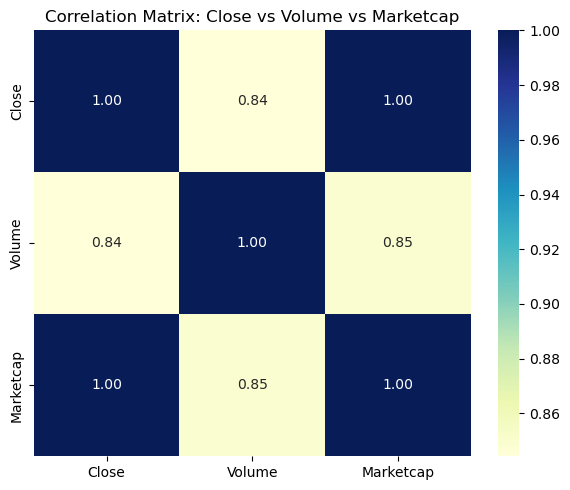

In [12]:
# Correlation matrix
correlation_data = df[['Close', 'Volume', 'Marketcap']].dropna()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_data.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix: Close vs Volume vs Marketcap")
plt.tight_layout()
plt.show()

Close price, trading volume, and market cap are all strongly positively correlated (r > 0.8). This supports the link between rising prices, increased investor activity, and overall market growth.

**EDA Summary**

- Bitcoin’s price and trading volume increased substantially between 2016 and 2018, with a speculative peak in 2017.  
- Average close prices by year and month reveal long-term growth and mild seasonal patterns, particularly in early and late months.  
- Daily returns are centered near zero but show heavy tails, indicating occasional high volatility.  
- Volatility and outliers are visible in both the boxplot and distribution of daily returns, with especially large return spikes in 2014.  
- Strong correlations between close price, volume, and market cap highlight market-wide trends during growth phases.